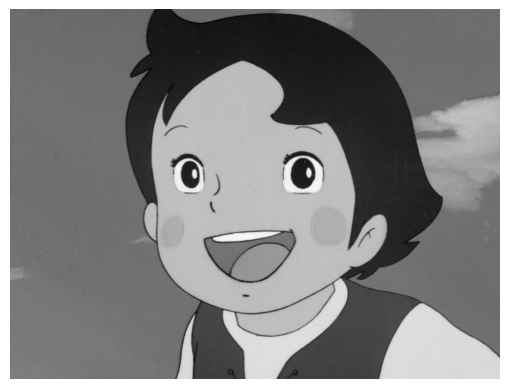

In [12]:
import cv2
import matplotlib.pyplot as plt
i=cv2.imread(r"C:\Users\hanal\Desktop\heidi-bd-photo.jpg")
i=cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(i,cmap='gray')
plt.show()

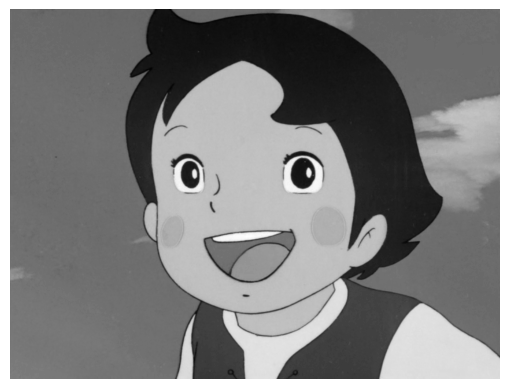

In [13]:
g=cv2.GaussianBlur(i,(3,3),0)
plt.axis('off')
plt.imshow(g,cmap='gray')
plt.show()

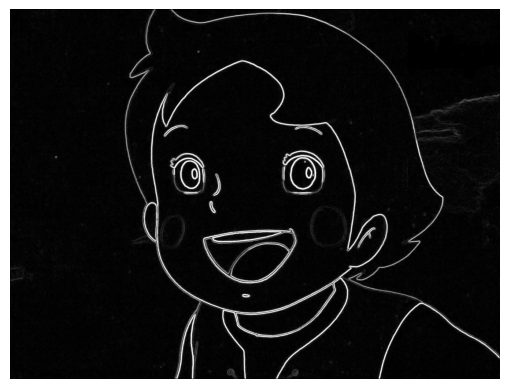

In [14]:
import numpy as np

kx = np.array([[-1,  0,  1],[-2,  0,  2],[-1,  0,  1]])
ky = np.array([[-1, -2, -1],[ 0,  0,  0], [ 1,  2,  1]])
r, c = g.shape
gx = np.zeros_like(g, dtype=np.float32)
gy = np.zeros_like(g, dtype=np.float32)


for i1 in range(1, r-1):
    for j1 in range(1, c-1):
        magx=0.0
        magy = 0.0
        for a in range(3):
            for b in range(3):
                xn = i1 + a - 1
                yn = j1 + b - 1
                magx += g[xn, yn] * kx[a, b]
                magy += g[xn, yn] * ky[a, b]
        gx[i1, j1] = magx
        gy[i1, j1] = magy

m = np.sqrt(gx**2 + gy**2)
ma = np.uint8(np.clip(m, 0, 255))
plt.axis('off')
plt.imshow(ma,cmap='gray')
plt.show()

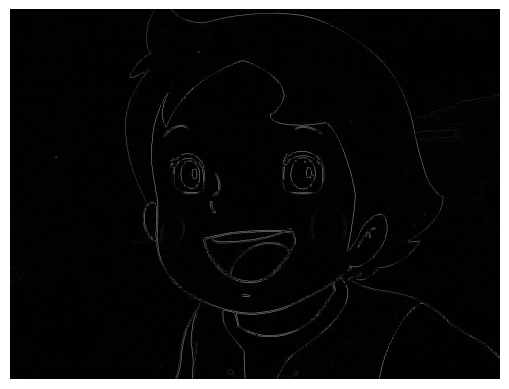

In [15]:
def nms(mag, dir):

    r,c = mag.shape

    sp = np.zeros_like(mag)

    # Convert angles to degrees
    dir = np.rad2deg(dir) % 180

    for i in range(1, r - 1):
        for j in range(1, c - 1):
            theta = dir[i, j]

            # Determine neighboring pixels based on gradient direction
            if (0 <= theta < 22.5) or (157.5 <= theta <= 180):
                n1 = mag[i, j + 1]
                n2 = mag[i, j - 1]
            elif (22.5 <= theta < 67.5):
                n1 = mag[i + 1, j - 1]
                n2 = mag[i - 1, j + 1]
            elif (67.5 <= theta < 112.5):
                n1 = mag[i + 1, j]
                n2 = mag[i - 1, j]
            elif (112.5 <= theta < 157.5):
                n1 = mag[i - 1, j - 1]
                n2 = mag[i + 1, j + 1]

            # Suppress non-maximum values
            if mag[i, j] >= n1 and mag[i, j] >= n2:
                sp[i, j] = mag[i, j]
            else:
                sp[i, j] = 0
    return sp

dir = np.arctan2(gy, gx)
s= nms(m, dir)

s_nms = np.uint8(np.clip(s, 0, 255))
plt.axis('off')
plt.imshow(s_nms, cmap='gray')
plt.show()

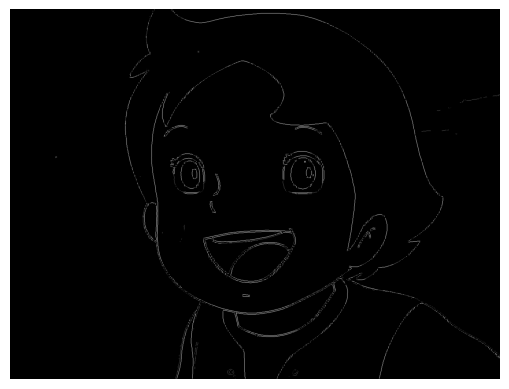

In [16]:
weak = 60
strong = 150
ids = np.zeros_like(s)

for i in range(c):
    for j in range(r):

            gm = s[j, i]

            if gm>strong:
                ids[j, i]= 255
            elif strong>gm>= weak:
                ids[j, i]= 100
            else:
                ids[j, i]= 0
ids1=ids.copy()
plt.axis('off')
plt.imshow(ids1,cmap='gray')
plt.show()

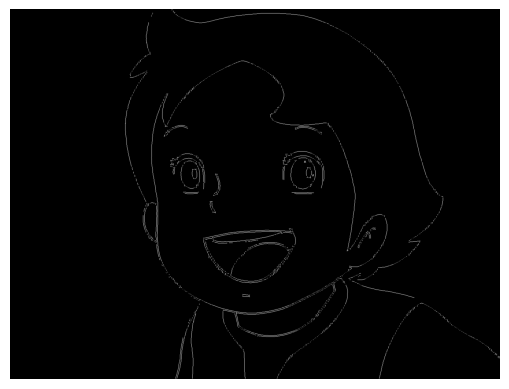

In [17]:
for i in range(1, r - 1):
    for j in range(1, c - 1):
        if ids[i, j] == 100:

            if np.any(ids[i-1:i+2, j-1:j+2] == 255):
                ids[i, j] = 255
            else:
                ids[i, j] = 0
plt.axis('off')
plt.imshow(ids,cmap='gray')
plt.show()

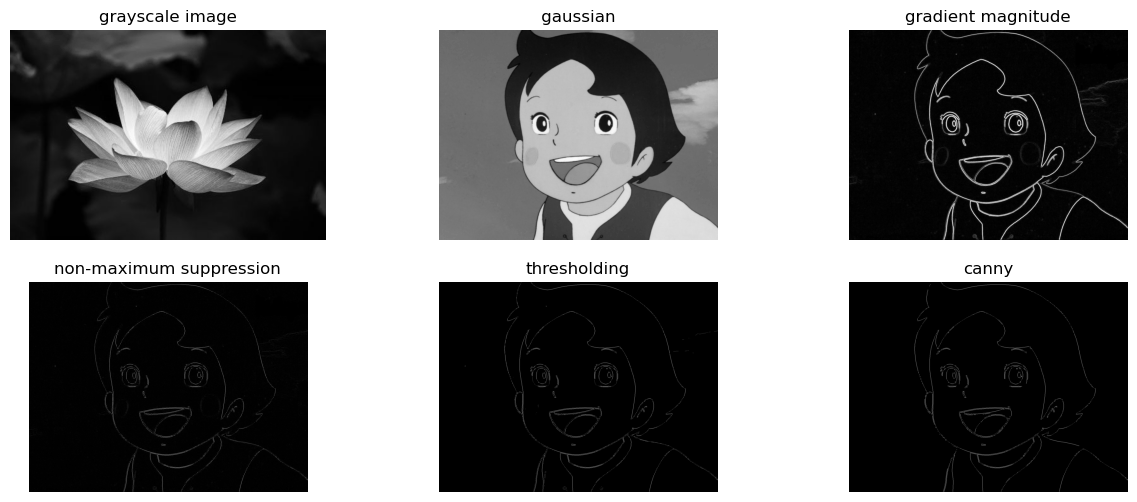

In [18]:


i=cv2.imread(r"C:\Users\hanal\Desktop\l.jpg")
i=cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,6))
plt.subplot(231)
plt.axis('off')
plt.title('grayscale image')
plt.imshow(i,cmap='gray')

plt.subplot(232)
plt.axis('off')
plt.title(' gaussian ')
plt.imshow(g,cmap='gray')

plt.subplot(233)
plt.axis('off')
plt.title('gradient magnitude')
plt.imshow(ma,cmap='gray')

plt.subplot(234)
plt.axis('off')
plt.title('non-maximum suppression')
plt.imshow(s_nms,cmap='gray')

plt.subplot(235)
plt.axis('off')
plt.title('thresholding')
plt.imshow(ids1,cmap='gray')


plt.subplot(236)
plt.axis('off')
plt.title('canny')
plt.imshow(ids,cmap='gray')
plt.show()

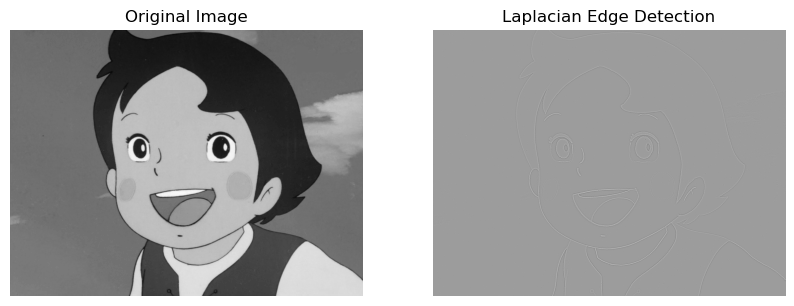

In [24]:
import cv2

i=cv2.imread(r"C:\Users\hanal\Desktop\heidi-bd-photo.jpg")
d=cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])
rows, cols = d.shape

output_image = np.zeros((rows, cols), dtype=np.float32)

for i in range(1, rows-1):
    for j in range(1, cols-1):
        # Extract the region of interest
        region = d[i-1:i+2, j-1:j+2]

        # Apply the kernel to the region
        output_value = np.sum(region * laplacian_kernel)

        # Store the result in the output image
        output_image[i, j] = output_value


output_image = cv2.normalize(output_image, None, 0, 255, cv2.NORM_MINMAX)
output_image = np.uint8(output_image)

# Display the original and the output image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(d, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Laplacian Edge Detection')
plt.axis('off')
plt.imshow(output_image, cmap='gray')
plt.show()



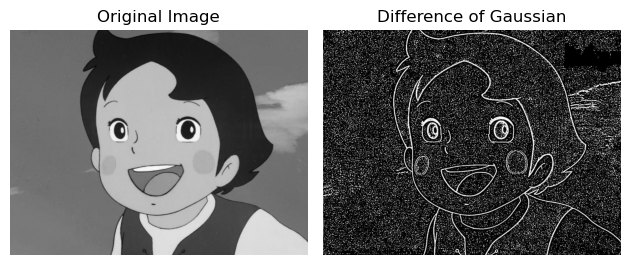

In [25]:
sigma1 = 1.0
sigma2 = 2.0

gaussian_blur1 = cv2.GaussianBlur(d, (0, 0), sigma1)
gaussian_blur2 = cv2.GaussianBlur(d, (0, 0), sigma2)

dog = gaussian_blur1 - gaussian_blur2


plt.subplot(121)
plt.title("Original Image")
plt.axis('off')
plt.imshow(d, cmap='gray')


plt.subplot(122)
plt.title("Difference of Gaussian")
plt.axis('off')
plt.imshow(dog, cmap='gray')

plt.tight_layout()
plt.show()


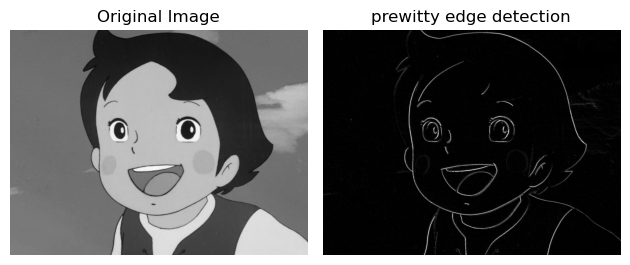

In [26]:
# img = cv2.imread('messi5.jpg')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

kx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
ky = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
px = cv2.filter2D(g, -1, kx)
py = cv2.filter2D(g, -1, ky)
im=px+py


plt.subplot(121)
plt.title("Original Image")
plt.axis('off')
plt.imshow(d, cmap='gray')


plt.subplot(122)
plt.title("prewitty edge detection")
plt.axis('off')
plt.imshow(im, cmap='gray')

plt.tight_layout()
plt.show()


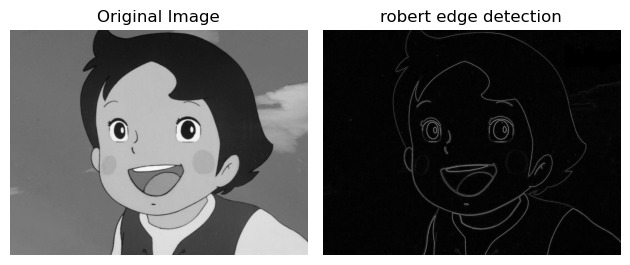

In [27]:
import cv2  
import numpy as np 
from scipy import ndimage 
roberts_cross_v = np.array( [[1, 0 ], 
                             [0,-1 ]] ) 
  
roberts_cross_h = np.array( [[ 0, 1 ], 
                             [ -1, 0 ]] ) 
  

im=d/255
vertical = ndimage.convolve( im, roberts_cross_v ) 
horizontal = ndimage.convolve( im, roberts_cross_h ) 
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical)) 
edged_img*=255




plt.subplot(121)
plt.title("Original Image")
plt.axis('off')
plt.imshow(d, cmap='gray')


plt.subplot(122)
plt.title("robert edge detection")
plt.axis('off')
plt.imshow(edged_img, cmap='gray')

plt.tight_layout()
plt.show()